In [1]:
#import packages
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#read in data (Following entirely the same data preprocessing stage)
data_MD_cause_of_death = pd.read_excel('D:\\Datasets\\Project-Data602\\cause_of_death_MD_10-19_xlsx.xlsx',engine='openpyxl')
data_CDC_cause_categories = pd.read_excel('D:\\Datasets\\Project-Data602\\CDC_cause_categories.xlsx')
data_income_10_11 = pd.read_excel('D:\\Datasets\\Project-Data602\\income_10-11.xlsx',
                                  skiprows=5)
data_income_12_13 = pd.read_excel('D:\\Datasets\\Project-Data602\\income_12-13.xlsx',
                                  skiprows=5)
data_income_14_16 = pd.read_excel('D:\\Datasets\\Project-Data602\\income_14-16.xlsx',
                                  skiprows=5)
data_income_17_19 = pd.read_excel('D:\\Datasets\\Project-Data602\\income_17-19.xlsx',
                                  skiprows=5)
data_deaths = pd.read_excel('D:\\Datasets\\Project-Data602\\total_deaths_xlsx.xlsx')

#add year column to all air data frames and then append them 
data_air_2010 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2010.csv')
data_air_2011 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2011.csv')
data_air_2012 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2012.csv')
data_air_2013 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2013.csv')
data_air_2014 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2014.csv')
data_air_2015 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2015.csv')
data_air_2016 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2016.csv')
data_air_2017 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2017.csv')
data_air_2018 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2018.csv')
data_air_2019 = pd.read_csv('D:\\Datasets\\Project-Data602\\EPA_2019.csv')

## Clean up data

In [3]:
#this function takes a dataframe and column name that contains the location name
#returns a state for the columns that are "County, State"
def get_state_col(df, col_name):

  #split the value in the county column and grab the last item 
  #in the resulting list
  state = df[col_name].strip('*').split()[-1]

  return state

In [4]:
#this function takes a dataframe and column name that contains the location name
#returns just the county name for the columns that are "County, State"
def get_county_col(df, col_name):

  #index the string in the county column to grab all
  #but the last 4 positions (", state")
  county = df[col_name].strip('*')[:-4]
  
  return county

In [5]:
#create a dataframe for MD data starting with the cause of death dataframe
#but dropping some unnecessary columns
MD_df = data_MD_cause_of_death.drop(['Notes', 'Crude Rate', 'Year Code'], axis=1)

#use the get_state_col and get_county_col functions
MD_df['State'] = MD_df.apply(lambda x: get_state_col(x, 'County'), axis=1)
MD_df['County'] = MD_df.apply(lambda x: get_county_col(x, 'County'), axis=1)
#MD_df.tail()

In [6]:
#same process for the income dataframes
income_10_11_df = data_income_10_11.drop(['GeoFips', 'LineCode'], axis=1)

income_10_11_df['State'] = income_10_11_df.apply(lambda x: get_state_col(x, 'GeoName'), axis=1)
income_10_11_df['County'] = income_10_11_df.apply(lambda x: get_county_col(x, 'GeoName'), axis=1)
#income_10_11_df.tail()

In [7]:
#same process for the income dataframes
income_12_13_df = data_income_12_13.drop(['GeoFips', 'LineCode'], axis=1)

income_12_13_df['State'] = income_12_13_df.apply(lambda x: get_state_col(x, 'GeoName'), axis=1)
income_12_13_df['County'] = income_12_13_df.apply(lambda x: get_county_col(x, 'GeoName'), axis=1)
#income_12_13_df.tail()

In [8]:
#same process for the income dataframes
income_14_16_df = data_income_14_16.drop(['GeoFips', 'LineCode'], axis=1)

income_14_16_df['State'] = income_14_16_df.apply(lambda x: get_state_col(x, 'GeoName'), axis=1)
income_14_16_df['County'] = income_14_16_df.apply(lambda x: get_county_col(x, 'GeoName'), axis=1)
#income_14_16_df.tail()

In [9]:
#same process for the income dataframes
income_17_19_df = data_income_17_19.drop(['GeoFips', 'LineCode'], axis=1)

income_17_19_df['State'] = income_17_19_df.apply(lambda x: get_state_col(x, 'GeoName'), axis=1)
income_17_19_df['County'] = income_17_19_df.apply(lambda x: get_county_col(x, 'GeoName'), axis=1)
#income_17_19_df.tail()

In [10]:
#the values in the "Description" column in the income dataframes should
#be columns and the years should be row values
#this function uses the melt function to do that
#it takes the dataframe and a list of the years that are column names that
#we want to be in the rows
def melt_income_df(df, value_vars_list):

  new_df = df.melt(id_vars=['County', 'State', 'Description'],
                                             value_vars=value_vars_list, 
                                             var_name='Year')
  
  return new_df

In [11]:
#use the melt_income_df function to switch the columns and rows
income_10_11_pivot_df = melt_income_df(income_10_11_df, ['2010','2011'])
income_10_11_pivot_df.tail()

,County,State,Description,Year,value
18823,Washakie,WY,Population (persons) 1/,2011,8449
18824,Washakie,WY,Per capita personal income (dollars) 2/,2011,41591
18825,Weston,WY,Personal income (thousands of dollars),2011,287716
18826,Weston,WY,Population (persons) 1/,2011,7142
18827,Weston,WY,Per capita personal income (dollars) 2/,2011,40285


In [12]:
#follow the same process for all income dataframes
income_12_13_pivot_df = melt_income_df(income_12_13_df, ['2012','2013'])
income_14_16_pivot_df = melt_income_df(income_14_16_df, ['2014','2015','2016'])
income_17_19_pivot_df = melt_income_df(income_17_19_df, ['2017','2018','2019'])

In [13]:
#append the income dataframes together
income_df = income_10_11_pivot_df.append(income_12_13_pivot_df)
income_df = income_df.append(income_14_16_pivot_df)
income_df = income_df.append(income_17_19_pivot_df)

#strip some extra characters from description column
income_df['Description'] = income_df['Description'].str.strip('12/ ')

#drop some rows with extra info
income_df = income_df.loc[(income_df['Description'] != 'Personal income (thousands of dollars)') &
                          (income_df['Description'] != 'Population (persons)')]

#rename "value" column to something more descriptive
income_df = income_df.rename(columns={'value':'per_capita_income_dollars'}).drop('Description', axis=1)

In [14]:
#make county names consistent with MD death dataframe
income_df['County'] = income_df['County'] + ' County'
income_df.loc[income_df['County'] == 
              'Baltimore (Independent City) County','County'] = 'Baltimore city'

In [15]:
#drop unnecessary columns
deaths_df = data_deaths.drop(['Year Code', 'Crude Rate'], axis=1)

#get county and state columns
deaths_df['State'] = deaths_df.apply(lambda x: get_state_col(x, 'County'), axis=1)
deaths_df['County'] = deaths_df.apply(lambda x: get_county_col(x, 'County'), axis=1)

#rename "Deaths" column to "Total Deaths"
deaths_df = deaths_df.rename(columns={'Deaths':'Total Deaths'})

#deaths_df.tail()

In [16]:
#remove the decimal from cause of death code so this column can be linked
#to the more-general cause of death categories from CDC
def get_cause_code(df):
  new_code = df['Cause of death Code'][:3]
  return new_code

MD_df['Cause of death Code no decimal'] = MD_df.apply(lambda x: get_cause_code(x), 
                                                      axis=1)


Merge all data together

In [17]:
#add year column to all air data frames and then append them 

data_air_2010['Year'] = '2010'
data_air_2011['Year'] = '2011'
data_air_2012['Year'] = '2012'
data_air_2013['Year'] = '2013'
data_air_2014['Year'] = '2014'
data_air_2015['Year'] = '2015'
data_air_2016['Year'] = '2016'
data_air_2017['Year'] = '2017'
data_air_2018['Year'] = '2018'
data_air_2019['Year'] = '2019'

air_df = data_air_2010.append([data_air_2011, data_air_2012, data_air_2013,
                               data_air_2014, data_air_2015, data_air_2016,
                               data_air_2017, data_air_2018, data_air_2019], 
                              ignore_index=True)

#data_air_2010.head()
air_df.head()

,County Code,County,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,Lead Max 3-Mo Avg,Year
0,1003,"Baldwin County, AL",.,.,.,.,0.09,0.074,.,.,.,20,10.2,.,.,.,2010
1,1027,"Clay County, AL",.,.,.,.,.,.,.,.,.,22,10.5,.,.,.,2010
2,1033,"Colbert County, AL",.,.,.,.,0.08,0.068,.,.,.,22,11.1,.,.,.,2010
3,1049,"DeKalb County, AL",.,.,.,.,0.08,0.071,.,.,.,.,.,.,.,.,2010
4,1051,"Elmore County, AL",.,.,.,.,0.08,0.073,.,.,.,.,.,.,.,.,2010


In [18]:
#get county and state columns in air_df
air_df['State'] = air_df.apply(lambda x: get_state_col(x, 'County'), axis=1)
air_df['County'] = air_df.apply(lambda x: get_county_col(x, 'County'), axis=1)
#air_df.head()

In [19]:
#make county names consistent with MD death dataframe
air_df.loc[air_df['County'] == 'Baltimore (City)','County'] = 'Baltimore city'

In [20]:
#replace '.' with np.nan
air_df = air_df.replace('.', np.nan)
air_df.head()

,County Code,County,CO 2nd Max 1-hr,CO 2nd Max 8-hr,NO2 98th Percentile 1-hr,NO2 Mean 1-hr,Ozone 2nd Max 1-hr,Ozone 4th Max 8-hr,SO2 99th Percentile 1-hr,SO2 2nd Max 24-hr,SO2 Mean 1-hr,PM2.5 98th Percentile 24-hr,PM2.5 Weighted Mean 24-hr,PM10 2nd Max 24-hr,PM10 Mean 24-hr,Lead Max 3-Mo Avg,Year,State
0,1003,Baldwin County,NaN,NaN,NaN,NaN,0.09,0.074,NaN,NaN,NaN,20,10.2,NaN,NaN,NaN,2010,AL
1,1027,Clay County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,10.5,NaN,NaN,NaN,2010,AL
2,1033,Colbert County,NaN,NaN,NaN,NaN,0.08,0.068,NaN,NaN,NaN,22,11.1,NaN,NaN,NaN,2010,AL
3,1049,DeKalb County,NaN,NaN,NaN,NaN,0.08,0.071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,AL
4,1051,Elmore County,NaN,NaN,NaN,NaN,0.08,0.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,AL


In [21]:
air_df['PM2.5 98th Percentile 24-hr'].isnull().sum()/air_df.shape[0]

0.47242380261248185

In [22]:
air_df['Ozone 2nd Max 1-hr'].isnull().sum()/air_df.shape[0]

0.19977192618702053

In [23]:
air_df.loc[air_df['State']=='MD']['Ozone 2nd Max 1-hr'].isnull().sum()/air_df.loc[air_df['State']=='MD'].shape[0]

0.05625

In [24]:
MD_df = MD_df.merge(deaths_df[['County', 'Year', 'Total Deaths', 'State']], 
                    on=['County', 'State', 'Year'])

In [25]:
MD_df['Year'] = MD_df['Year'].astype('str')
MD_df = MD_df.merge(income_df, on=['County', 'State', 'Year'])
#MD_df.tail()

In [26]:
MD_df = MD_df.merge(data_CDC_cause_categories, left_on='Cause of death Code no decimal',
                    right_on = 'Code')
#MD_df.head()

In [27]:
MD_df = MD_df.merge(air_df[['Year', 'County', 'State', 'Ozone 2nd Max 1-hr']], 
                    left_on=['County', 'State', 'Year'],
                    right_on=['County', 'State', 'Year'],
                    how = 'left')
MD_df.head()

,County,County Code,Year,Cause of death,Cause of death Code,Deaths,Population,State,Cause of death Code no decimal,Total Deaths,per_capita_income_dollars,Code,Category,Ozone 2nd Max 1-hr
0,Allegany County,24001,2010,"Septicaemia, unspecified",A41.9,15,75087,MD,A41,913,32000,A41,Certain infectious and parasitic diseases,NaN
1,Allegany County,24001,2011,"Septicaemia, unspecified",A41.9,15,74692,MD,A41,908,33253,A41,Certain infectious and parasitic diseases,NaN
2,Allegany County,24001,2012,"Septicaemia, unspecified",A41.9,12,74012,MD,A41,869,33941,A41,Certain infectious and parasitic diseases,NaN
3,Allegany County,24001,2013,"Septicaemia, unspecified",A41.9,15,73521,MD,A41,946,34504,A41,Certain infectious and parasitic diseases,NaN
4,Allegany County,24001,2014,"Septicaemia, unspecified",A41.9,15,72952,MD,A41,910,35800,A41,Certain infectious and parasitic diseases,NaN


In [28]:
MD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8450 entries, 0 to 8449
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   County                          8450 non-null   object
 1   County Code                     8450 non-null   int64 
 2   Year                            8450 non-null   object
 3   Cause of death                  8450 non-null   object
 4   Cause of death Code             8450 non-null   object
 5   Deaths                          8450 non-null   int64 
 6   Population                      8450 non-null   int64 
 7   State                           8450 non-null   object
 8   Cause of death Code no decimal  8450 non-null   object
 9   Total Deaths                    8450 non-null   object
 10  per_capita_income_dollars       8450 non-null   object
 11  Code                            8450 non-null   object
 12  Category                        8450 non-null   

## Exploratory data analysis

Explore income data

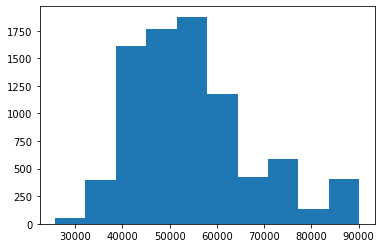

In [29]:
#Plot the histogram of the per capita income to get an idea of the distribution
income_hist = plt.hist(MD_df['per_capita_income_dollars'])

It looks like the average is around $50,000 and the data is skewed right.

Take a look at some basic statistics about the income data:

In [30]:
avg_income = MD_df['per_capita_income_dollars'].mean()
stdev_income = MD_df['per_capita_income_dollars'].std()
stdev_minus3_income = avg_income - 3*(stdev_income)
stdev_plus3_income = avg_income + 3*(stdev_income)
min_income = MD_df['per_capita_income_dollars'].min()
max_income = MD_df['per_capita_income_dollars'].max()

print('Average: ',avg_income)
print('Standard dev: ', stdev_income)
print('Min: ', min_income)
print('Max: ', max_income)
print('Mean minus 3 st. dev.s: ', stdev_minus3_income)
print('Mean plut 3 st. dev.s: ', stdev_plus3_income)

Average:  54775.56816568047
Standard dev:  12746.76584128779
Min:  25701
Max:  90139
Mean minus 3 st. dev.s:  16535.270641817107
Mean plut 3 st. dev.s:  93015.86568954383


Figure out how many income buckets we should have using standard deviation

In [31]:
(max_income - min_income)/stdev_income

5.055243094784105

Five income buckets could be:


1.   income < 39,000
2.   39,000 <= income < 52,000
3.   52,000 <= income < 65,000
4.   65,000 <= income < 78,000
5.   income >= 78,000



In [32]:
#add bucket column to df using get_income_bucket function
bins = [0,50000,90000,200000]
labels = ["Poor","Middle","Rich"]
MD_df['income_bucket'] = pd.cut(MD_df['per_capita_income_dollars'], bins=bins, labels=labels)

Use LabelEncoder to get a numerical code for each cause of death:

In [33]:
MD_df['income_bucket'].value_counts()

Middle    4910
Poor      3437
Rich       103
Name: income_bucket, dtype: int64

In [34]:
MD_df.head()

,County,County Code,Year,Cause of death,Cause of death Code,Deaths,Population,State,Cause of death Code no decimal,Total Deaths,per_capita_income_dollars,Code,Category,Ozone 2nd Max 1-hr,income_bucket
0,Allegany County,24001,2010,"Septicaemia, unspecified",A41.9,15,75087,MD,A41,913,32000,A41,Certain infectious and parasitic diseases,NaN,Poor
1,Allegany County,24001,2011,"Septicaemia, unspecified",A41.9,15,74692,MD,A41,908,33253,A41,Certain infectious and parasitic diseases,NaN,Poor
2,Allegany County,24001,2012,"Septicaemia, unspecified",A41.9,12,74012,MD,A41,869,33941,A41,Certain infectious and parasitic diseases,NaN,Poor
3,Allegany County,24001,2013,"Septicaemia, unspecified",A41.9,15,73521,MD,A41,946,34504,A41,Certain infectious and parasitic diseases,NaN,Poor
4,Allegany County,24001,2014,"Septicaemia, unspecified",A41.9,15,72952,MD,A41,910,35800,A41,Certain infectious and parasitic diseases,NaN,Poor


In [35]:
MD_df['cause_num'] = LabelEncoder().fit_transform(MD_df['Cause of death'])#Converting to int 
MD_df['category_num'] = LabelEncoder().fit_transform(MD_df['Category'])#Converting to int 
MD_df.tail()

,County,County Code,Year,Cause of death,Cause of death Code,Deaths,Population,State,Cause of death Code no decimal,Total Deaths,per_capita_income_dollars,Code,Category,Ozone 2nd Max 1-hr,income_bucket,cause_num,category_num
8445,Baltimore city,24510,2015,"Decubitus ulcer and pressure area, unspecified",L89.9,10,621849,MD,L89,6474,46123,L89,Diseases of the skin and subcutaneous tissue,0.09,Poor,57,10
8446,Baltimore city,24510,2017,Other specified conduction disorders,I45.8,10,611648,MD,I45,6587,49083,I45,Diseases of the circulatory system,0.08,Poor,155,5
8447,Baltimore city,24510,2018,Mental and behavioural disorders due to multip...,F19.1,16,602495,MD,F19,6753,51577,F19,Mental and behavioral disorders,0.1,Middle,128,14
8448,Baltimore city,24510,2019,Mental and behavioural disorders due to multip...,F19.1,11,593490,MD,F19,6642,53378,F19,Mental and behavioral disorders,0.09,Middle,128,14
8449,Baltimore city,24510,2019,Local infection of skin and subcutaneous tissu...,L08.9,10,593490,MD,L08,6642,53378,L08,Diseases of the skin and subcutaneous tissue,0.09,Middle,115,10


In [36]:
MD_df['Total Deaths']=MD_df['Total Deaths'].astype(int)

## Income bucket contributing to Total Deaths

In [37]:
MD_df[["income_bucket","Total Deaths"]].groupby(MD_df["income_bucket"],as_index=False).mean().sort_values(by='Total Deaths',ascending=False)

,Total Deaths
2,6205.000000
1,4322.003462
0,3899.167297


## Cause of death having more deaths

In [38]:
MD_df[['cause_num','Total Deaths']].groupby("cause_num",as_index=False).mean().sort_values(by="Total Deaths",ascending=False)

,cause_num,Total Deaths
167,167,8519.000000
154,154,8511.000000
75,75,8503.000000
174,174,8487.000000
0,0,8055.500000
...,...,...
9,9,2079.224215
24,24,2019.137931
31,31,1981.417722
177,177,1268.571429


### Hypothesis Testing
#### Performing Chi-Square Test to determine relationship

###### H0: There is no relationship between the features- Null hypothesis
###### H1: There is a relationship between the features- Alternate hypothesis

In [39]:
import scipy.stats as stats
data=pd.crosstab(MD_df['Cause of death'],MD_df['Category'])

In [40]:
val=stats.chi2_contingency(data) #You can view this table, however, it would be difficult to visualize

In [41]:
#We wish to find the degree of freedom
no_of_rows=len(data.iloc[0:2,0])
no_of_columns=len(data.iloc[0,0:2])
dof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom=",dof)
alpha = 0.05

Degree of Freedom= 1


In [42]:
Observed_Values = data.values 
Observed_Values

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ..., 59,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [43]:
Expected_Values=val[3] #You can select any random value

In [44]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)]) #Chi-Square formula.
chi_square_statistic=chi_square[0]+chi_square[1]

In [45]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 16783.00000000003


In [46]:
critical_value=chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [47]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)

if chi_square_statistic>=critical_value:
    print("Reject the null hypothesis, hence relationship exists")
else:
    print("Accept the null hypothesis i.e H0, so no relationship between the features")
    
if p_value<=alpha:
    print("Reject the null hypothesis, hence relationship exists")
else:
    print("Accept the null hypothesis i.e H0, so no relationship between the features")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
Reject the null hypothesis, hence relationship exists
Reject the null hypothesis, hence relationship exists


##### Hence category and cause of death has a relationship amongst themselves.

##### Determine Income VS Category relationship

In [48]:
data=pd.crosstab(MD_df['income_bucket'],MD_df['Category'])
val1=stats.chi2_contingency(data) 
no_of_rows=len(data.iloc[0:2,0])
no_of_columns=len(data.iloc[0,0:2])
dof_1=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom=",dof)
alpha = 0.05
Observed_Values1 = data.values 
print("Observed Values :-\n",Observed_Values1)

Degree of Freedom= 1
Observed Values :-
 [[  48   20  148    8    0 1078  124  106  191  300    1  184   69   48
   141  826   98   15   32]
 [  31   16  137    6    5 1541  194  167  296  420    1  241  114   89
   168 1268  169    5   42]
 [   1    1    2    0    0   30    5    5    8    6    0    4    2    3
     2   25    7    0    2]]


In [49]:
#Evaluate chi-square metrics
Expected_Values1=val1[3]
chi_square1=sum([(o-e)**2./e for o,e in zip(Observed_Values1,Expected_Values1)])
chi_square_statistic1=chi_square1[0]+chi_square1[1]
print("chi-square statistic:-",chi_square_statistic1)
critical_value1=chi2.ppf(q=1-alpha,df=dof_1)
print('critical_value:',critical_value1)

chi-square statistic:- 16.208039072041355
critical_value: 3.841458820694124


In [50]:
#p and chi square statistic value
p_value=1-chi2.cdf(x=chi_square_statistic,df=dof_1)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof_1)
print('p-value:',p_value)


if chi_square_statistic1>=critical_value1:
    print("Reject the null hypothesis, hence relationship exists")
else:
    print("Accept the null hypothesis i.e H0, so no relationship between the features")
    
if p_value<=alpha:
    print("Reject the null hypothesis, hence relationship exists")
else:
    print("Accept the null hypothesis i.e H0, so no relationship between the features")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0
Reject the null hypothesis, hence relationship exists
Reject the null hypothesis, hence relationship exists


In [51]:
#Use mean to fill missing values
MD_df['Ozone 2nd Max 1-hr']=MD_df['Ozone 2nd Max 1-hr'].astype(float)
MD_df['Ozone 2nd Max 1-hr']=MD_df['Ozone 2nd Max 1-hr'].fillna(MD_df['Ozone 2nd Max 1-hr'].mean())
MD_df['income_bucket']=MD_df['income_bucket'].map({'Poor':0,'Middle':1,'Rich':3})
MD_df['income_bucket']=MD_df['income_bucket'].astype(int)

<AxesSubplot:>

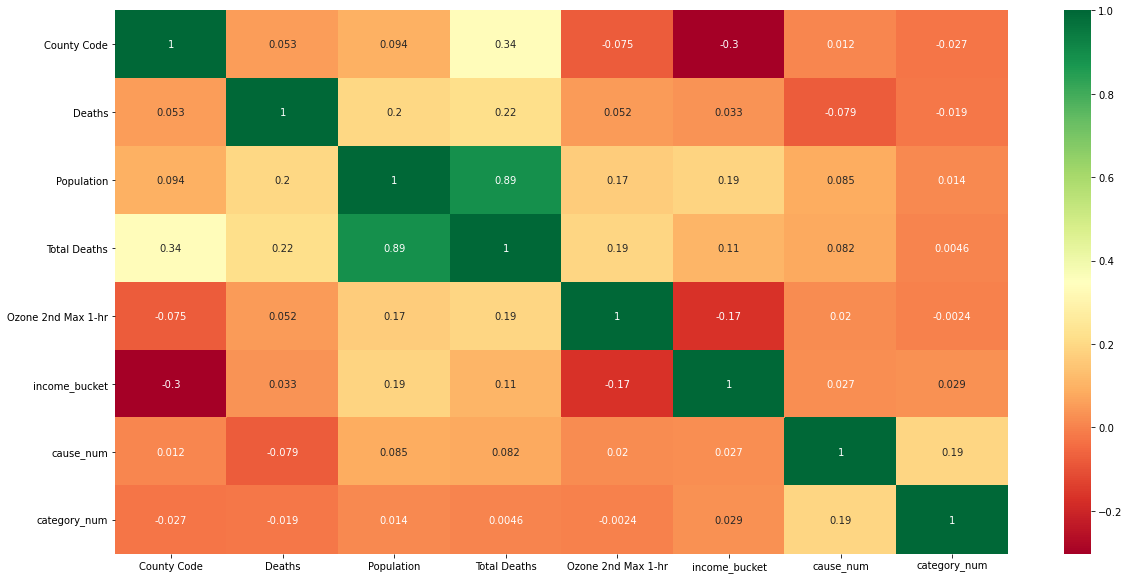

In [52]:
#Corellation plot
plt.figure(figsize=(20,10))
sn.heatmap(MD_df.corr(),annot=True, cmap='RdYlGn')

In [53]:
MD_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8450 entries, 0 to 8449
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   County                          8450 non-null   object 
 1   County Code                     8450 non-null   int64  
 2   Year                            8450 non-null   object 
 3   Cause of death                  8450 non-null   object 
 4   Cause of death Code             8450 non-null   object 
 5   Deaths                          8450 non-null   int64  
 6   Population                      8450 non-null   int64  
 7   State                           8450 non-null   object 
 8   Cause of death Code no decimal  8450 non-null   object 
 9   Total Deaths                    8450 non-null   int32  
 10  per_capita_income_dollars       8450 non-null   object 
 11  Code                            8450 non-null   object 
 12  Category                        84

In [54]:
MD_df.head()

,County,County Code,Year,Cause of death,Cause of death Code,Deaths,Population,State,Cause of death Code no decimal,Total Deaths,per_capita_income_dollars,Code,Category,Ozone 2nd Max 1-hr,income_bucket,cause_num,category_num
0,Allegany County,24001,2010,"Septicaemia, unspecified",A41.9,15,75087,MD,A41,913,32000,A41,Certain infectious and parasitic diseases,0.091581,0,182,2
1,Allegany County,24001,2011,"Septicaemia, unspecified",A41.9,15,74692,MD,A41,908,33253,A41,Certain infectious and parasitic diseases,0.091581,0,182,2
2,Allegany County,24001,2012,"Septicaemia, unspecified",A41.9,12,74012,MD,A41,869,33941,A41,Certain infectious and parasitic diseases,0.091581,0,182,2
3,Allegany County,24001,2013,"Septicaemia, unspecified",A41.9,15,73521,MD,A41,946,34504,A41,Certain infectious and parasitic diseases,0.091581,0,182,2
4,Allegany County,24001,2014,"Septicaemia, unspecified",A41.9,15,72952,MD,A41,910,35800,A41,Certain infectious and parasitic diseases,0.091581,0,182,2


In [55]:
MD_df.to_csv(r'D:\\MD_df.csv', index = False)# To use the csv or dataframe in the deployment file

In [56]:
MD_df['Cause of death'].value_counts()

Bronchus or lung, unspecified - Malignant neoplasms                                                                 237
Atherosclerotic heart disease                                                                                       232
Unspecified dementia                                                                                                224
Chronic obstructive pulmonary disease, unspecified                                                                  224
Acute myocardial infarction, unspecified                                                                            223
                                                                                                                   ... 
Intentional self-poisoning by and exposure to other and unspecified drugs, medicaments and biological substances      1
Newborn affected by chorioamnionitis                                                                                  1
Person injured in collision between othe

In [57]:
#Changing type from object to int
MD_df['income_bucket']=MD_df['income_bucket'].astype(int)
MD_df['Population']=MD_df['Population'].astype(int)
MD_df['cause_num']=MD_df['cause_num'].astype(int)

In [58]:
#Modeling by a sample linear regression to predict the death.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=MD_df[['income_bucket','Population','cause_num']]
y=MD_df['Deaths']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
lr=LinearRegression()

In [59]:
l=lr.fit(X_train,y_train)

In [60]:
lr.score(X_test,y_test)

0.03970200331406615

In [61]:
y_pred=l.predict(X_test)

In [62]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train);

In [63]:
rf.score(X_test,y_test)

0.9263799721293686

In [64]:
rf.score(X_train,y_train)

0.9934999293110444

In [65]:
# Feature importance of income level, Population and cause of death

rf.feature_importances_

array([0.01371698, 0.22727551, 0.75900751])

In [66]:
#Model parameter tuning in Random forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [67]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [68]:
rf_1=rf_random.fit(X_train,y_train)
predictions=rf_1.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [69]:
from sklearn import metrics

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.286208823455917
MSE: 281.22497071271505
RMSE: 16.769763585474752


#### Pickle file

In [70]:
import pickle
file = open('fin_rf.pkl','wb')
pickle.dump(rf_1,file)